In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# Problem 1

## Derivative functions

In [29]:
# This is for problem 2, where y[0] is xdot, y[1] is xdouble dot
def y_prime(t, y):
    dydt = np.array([y[1] , -y[0]])
    return dydt

# This is for problem 3, where y[0] is xdot, y[1] is xdouble dot, y[2] is ydot, y[3] is ydouble dot
def der(t, z):
    x = z[0]
    y = z[2]
    dydt = np.array([z[1], -x/((1 + x**2 + y**2)**(3/2)), z[3], -y/((1 + x**2 + y**2)**(3/2))])
    return dydt

## Euler's Method

In [30]:
# inputs are initial conditions, derivative, start time, end time, number of steps to take
def Euler(y, dydt, t_i, t_f, n_steps):
    # this initializes the process, and creates a storage y_s for all our values as we integrate 
    t = t_i
    h = (t_f - t_i) / n_steps
    y_s1 = []
    
    # this is one step of Euler: takes in function, derivative, start and stop time, and number of steps
    # I am using steps instead of the step size to avoid float math errors. This, combined with a less than
    # condition (instead of less than or equal to) in the loop below achieve that.
    def babyEuler(y, dydt, t_i, t_f, h):
        y = np.array(y)
        y_n1 = y + (h * dydt(t, y))
        return h, y_n1;

    # while we are in the time interval we integrate
    while t < t_f:
        dt, y_new = babyEuler(y, dydt, t_i, t_f, h)
        y_s1.append(y_new)
        y = y_new
        t += dt
    
    last = y[0] # saving the last value as a separate entity to compare the methods later
    y_a1 = np.array(y_s1) # going from list to array to plot things later
    
    
    return last, y_a1;

## Runge-Kutta Method

In [31]:
# inputs are initial conditions, derivative, start time, end time, number of steps to take
def RungeKutta(y, dydt, t_i, t_f, n_steps):
    # this initializes the process, and creates a storage y_s for all our values as we integrate
    t = t_i
    h = (t_f - t_i) / n_steps
    y_s2 = []
    
    # this is one step of rk4: takes in function, derivative, start and stop time, and number of steps
    # I am using steps instead of the step size to avoid float math errors. This, combined with a less than
    # condition (instead of less than or equal to) in the loop below achieve that.
    def baby_rk4(y, dydt, t_i, t_f, h):
        k1 = h * dydt(t, y);
        k2 = h * dydt(t + (h/2), y + (k1 / 2));
        k3 = h * dydt(t + (h/2), y + (k2 / 2));
        k4 = h * dydt(t + h, y + k3);
        y_n1 = y + (k1 / 6) + (k2 / 3) + (k3 / 3) + (k4 / 6);
        return h, y_n1;


    #rk4 on our interval, saving all values and returning the last one
    while t < t_f:
        dt, y_new = baby_rk4(y, dydt, t_i, t_f, h)
        y_s2.append(y_new)
        y = y_new
        t += dt
        
    last = y[0] # saving the last value as a separate entity to compare the methods later
    y_b1 = np.array(y_s2) # going from list to array to plot things later

    return last, y_b1;

## Leapfrog Method

In [32]:
def LeapFrog(z, dydt, t_i, t_f, n_steps):
    
    #initialization stuff
    t = t_i
    h = (t_f - t_i) / n_steps
    y_s3 = []
   
    # for problem 2: the steps are coupled as the equations are. Indices used for ease.
    if len(z) == 2:
        while t < t_f:
            index_x = 0
            index_vx = 1
            f = dydt(t, z)
            v_half = z[index_vx] + h/2 * f[index_vx]
            
            z_half = np.array([z[index_x], v_half])
            f = dydt(t, z_half)
            
            x_final = z_half[index_x] + h * f[index_x]
            
            z_almost_there = np.array([x_final, z_half[index_vx]])
            
            f = dydt(t, z_almost_there)
            v_final = z_almost_there[index_vx] + h/2 * f[index_vx]
            
            z_final = np.array([x_final, v_final])
            
            y_s3.append(z_final)
            z = np.copy(z_final)
            t += h  
            
            
    # for problem 3, same as problem 2, but this time our x equations and y are solved in parallel
    if len(z) == 4:
        while t < t_f:
            index_x = 0
            index_vx = 1
            index_y = 2
            index_vy = 3
            
            f = dydt(t, z)
            vx_half = z[index_vx] + h/2 * f[index_vx]
            vy_half = z[index_vy] + h/2 * f[index_vy]
            
            z_half = np.array([z[index_x], vx_half, z[index_y], vy_half])
            f = dydt(t, z_half)
            
            x_final = z_half[index_x] + h * f[index_x]
            y_final = z_half[index_y] + h * f[index_y]
            
            z_almost_there = np.array([x_final, z_half[index_vx],y_final, z_half[index_vy]])            
            f = dydt(t, z_almost_there)
            
            vx_final = z_almost_there[index_vx] + h/2 * f[index_vx]
            vy_final = z_almost_there[index_vy] + h/2 * f[index_vy]
            
            z_final = np.array([x_final, vx_final, y_final, vy_final])
            
            y_s3.append(z_final)
            z = np.copy(z_final)
            t += h
    
    y_c1 = np.array(y_s3) # going from list to array to plot things later
    last = y_c1[-1]
    
    return  last, y_c1;

# Problem 2

## Part a

All our h's in order: h = 1, 0.3, 0.1, 0.03, 0.01. \
Corresponding n_steps =  30, 100, 300, 1000, 3000.

### Euler

In [33]:
y0 = [1,0]; # initial condition
y = y0;
dydt = y_prime; # correct ODE
t_i = 0; # start time
t_f = 30; # end time
[E1, Eplot1] = Euler(y, dydt, t_i, t_f, 30);
[E2, Eplot2] = Euler(y, dydt, t_i, t_f, 100);
[E3, Eplot3] = Euler(y, dydt, t_i, t_f, 300);
[E4, Eplot4] = Euler(y, dydt, t_i, t_f, 1000);
[E5, Eplot5] = Euler(y, dydt, t_i, t_f, 3000);

### Runge-Kutta

In [34]:
y0 = [1,0]; # initial condition
y = y0;
dydt = y_prime; # correct oDE
t_i = 0; # start time
t_f = 30; # end time
[R1, Rplot1] = RungeKutta(y, dydt, t_i, t_f, 30);
[R2, Rplot2] = RungeKutta(y, dydt, t_i, t_f, 100);
[R3, Rplot3] = RungeKutta(y, dydt, t_i, t_f, 300);
[R4, Rplot4] = RungeKutta(y, dydt, t_i, t_f, 1000);
[R5, Rplot5] = RungeKutta(y, dydt, t_i, t_f, 3000);

### Leapfrog

In [35]:
y0 = np.array([1,0]); # initial condition
y = y0;
dydt = y_prime; # correct oDE
t_i = 0; # start time
t_f = 30; # end time
[F1, Fplot1] = LeapFrog(y, dydt, t_i, t_f, 30);
[F2, Fplot2] = LeapFrog(y, dydt, t_i, t_f, 100);
[F3, Fplot3] = LeapFrog(y, dydt, t_i, t_f, 300);
[F4, Fplot4] = LeapFrog(y, dydt, t_i, t_f, 1000);
[F5, Fplot5] = LeapFrog(y, dydt, t_i, t_f, 3000);

Outputs organized:

In [36]:
h = [1, 0.3, 0.1, 0.03, 0.01]
Eulernumbers = [E1, E2, E3, E4, E5]
Rungenumbers = [R1, R2, R3, R4, R5]
Frognumbers = [F1[0], F2[0], F3[0], F4[0], F5[0]]

print("Euler's Method:")
i = 0
while i<5:
    print(f"For h = {h[i]}, y = {Eulernumbers[i]} at t = 30.")
    i += 1
    
print("Runge-Kutta Method:")
i = 0
while i<5:
    print(f"For h = {h[i]}, y = {Rungenumbers[i]} for t = 30.")
    i += 1
    
print("Leapfrog " + "\U0001F438" + " Method:")
i = 0
while i<5:
    print(f"For h = {h[i]}, y = {Frognumbers[i]} for t = 30.")
    i += 1

Euler's Method:
For h = 1, y = 0.0 at t = 30.
For h = 0.3, y = -47.87118621318978 at t = 30.
For h = 0.1, y = 0.24660767983074217 at t = 30.
For h = 0.03, y = 0.22792034630626729 at t = 30.
For h = 0.01, y = 0.1780653315556998 at t = 30.
Runge-Kutta Method:
For h = 1, y = -0.010402602625927515 for t = 30.
For h = 0.3, y = 0.15223809411812883 for t = 30.
For h = 0.1, y = 0.15422651630495668 for t = 30.
For h = 0.03, y = 0.15425124909467444 for t = 30.
For h = 0.01, y = 0.15425144741438152 for t = 30.
Leapfrog 🐸 Method:
For h = 1, y = 1.0 for t = 30.
For h = 0.3, y = 0.26530895464135457 for t = 30.
For h = 0.1, y = 0.1666033594767803 for t = 30.
For h = 0.03, y = 0.15536300015619772 for t = 30.
For h = 0.01, y = 0.15437495402459922 for t = 30.


### Comments

The further we go, the more unstable Euler becomes, as can be seen from this graph:

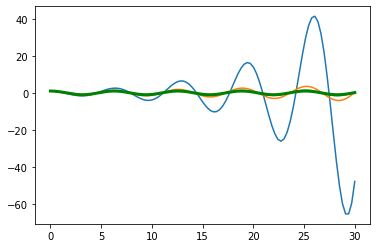

In [40]:
# plotting times against functions, times labeled txx, with a being Eueler, b being Leapfrog, c is RK4

# Euler graphing
taa = np.linspace(0,30,30);
tba = np.linspace(0,30,100);
tca = np.linspace(0,30,300);
tda = np.linspace(0,30,1000);
tea = np.linspace(0,30,3000);

#plt.plot(taa, Eplot1[:,0]) # i comment this out because the other step estimates can't be seen otherwise
plt.plot(tba, Eplot2[:,0])
plt.plot(tca, Eplot3[:,0])
plt.plot(tda, Eplot4[:,0])
plt.plot(tea, Eplot5[:,0])
# this is the actual function, with max amount of points used for t
plt.plot(tea, np.cos(tea), linewidth=3, color='green');

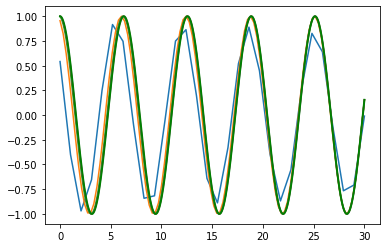

In [41]:
# Runge-Kutta graphing
tab = np.linspace(0,30, 30)
tbb = np.linspace(0,30, 100)
tcb = np.linspace(0,30, 300)
tdb = np.linspace(0,30, 1000)
teb = np.linspace(0,30, 3000)

plt.plot(tab, Rplot1[:,0])
plt.plot(tbb, Rplot2[:,0])
plt.plot(tcb, Rplot3[:,0])
plt.plot(tdb, Rplot4[:,0])
plt.plot(teb, Rplot5[:,0])
# this is actual function, in green
plt.plot(teb, np.cos(teb),linewidth=2, color='green');

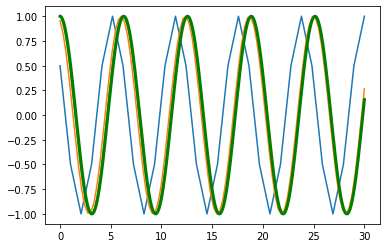

In [12]:
# Leapfrog graphing
tac = np.linspace(0,30, 30)
tbc = np.linspace(0,30, 100)
tcc = np.linspace(0,30, 300)
tdc = np.linspace(0,30, 1000)
tec = np.linspace(0,30, 3000)

plt.plot(tab, Fplot1[:,0])
plt.plot(tbb, Fplot2[:,0])
plt.plot(tcb, Fplot3[:,0])
plt.plot(tdb, Fplot4[:,0])
plt.plot(teb, Fplot5[:,0])
# this is actual function, in green
plt.plot(tec, np.cos(tec),linewidth=3, color='green');

What is noticeable from the solutions is that with smaller step size all the methods become more accurate. However, Euler is lagging far behind due to all the error it's picking up because it's O(h^2) versus rk's O(h^5) and Leapfrog's O(h^3). In fact, rk4 and Leapfrog diminish their deviation from the true value quicker because of this.

## Part b

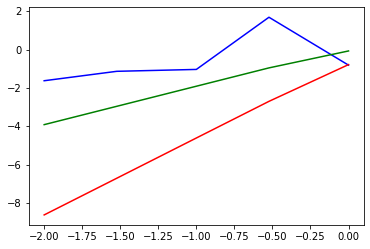

In [42]:
hlogged = np.log10(h)
Euler_error = np.log10(np.abs(Eulernumbers - np.cos(30)))
rk4_error = np.log10(np.abs(Rungenumbers - np.cos(30)))
Frog_error = np.log10(np.abs(Frognumbers - np.cos(30)))
plt.plot(hlogged, Euler_error, color='blue');
plt.plot(hlogged,rk4_error, color='red');
plt.plot(hlogged, Frog_error, color='green');

# Problem 3

Here is Runge-Kutta solving it:

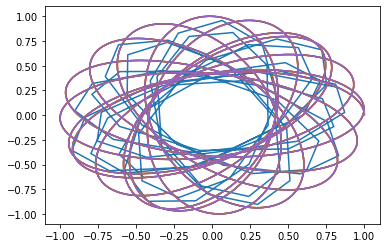

In [43]:
y0 = [1, 0, 0, 0.3]; # initial condition in the form y[x, dx, y, dy]
y = y0;
dydt = der; # correct ODE
t_i = 0; # start time
t_f = 100; # end time
[R1, Rplot1] = RungeKutta(y, dydt, t_i, t_f, 100);
[R2, Rplot2] = RungeKutta(y, dydt, t_i, t_f, 500);
[R3, Rplot3] = RungeKutta(y, dydt, t_i, t_f, 1000);
[R4, Rplot4] = RungeKutta(y, dydt, t_i, t_f, 5000);
[R5, Rplot5] = RungeKutta(y, dydt, t_i, t_f, 10000);

# x vs y plot of all the rk's steps
plt.plot(Rplot1[:,0], Rplot1[:,2]);
plt.plot(Rplot2[:,0], Rplot2[:,2]);
plt.plot(Rplot3[:,0], Rplot3[:,2]);
plt.plot(Rplot4[:,0], Rplot4[:,2]);
plt.plot(Rplot5[:,0], Rplot5[:,2]);

Not bad! Now Leapfrog:

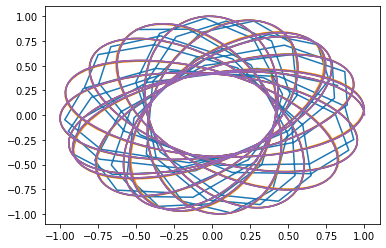

In [44]:
y0 = [1, 0, 0, 0.3]; # initial condition in the form y[x, dx, y, dy]
y = y0;
dydt = der; # correct ODE
t_i = 0; # start time
t_f = 100; # end time
[F1, Fplot1] = LeapFrog(y, dydt, t_i, t_f, 100);
[F2, Fplot2] = LeapFrog(y, dydt, t_i, t_f, 500);
[F3, Fplot3] = LeapFrog(y, dydt, t_i, t_f, 1000);
[F4, Fplot4] = LeapFrog(y, dydt, t_i, t_f, 5000);
[F5, Fplot5] = LeapFrog(y, dydt, t_i, t_f, 10000);

# x vs y plot of all the rk's steps
plt.plot(Fplot1[:,0], Fplot1[:,2]);
plt.plot(Fplot2[:,0], Fplot2[:,2]);
plt.plot(Fplot3[:,0], Fplot3[:,2]);
plt.plot(Fplot4[:,0], Fplot4[:,2]);
plt.plot(Fplot5[:,0], Fplot5[:,2]);

Now for our energies:

In [45]:
# this is the energy function
def Energy(input):
    index_x = 0
    index_vx = 1
    index_y = 2
    index_vy = 3
    result = []
    for i in range(len(input)):
        x = input[i][index_x]
        y = input[i][index_y]
        vx = input[i][index_vx]
        vy = input[i][index_vy]
        
        E = ((vx**2 + vy**2)/2.0) - (1.0/np.sqrt(1 + x**2 + y**2))
        result.append(E)
    return np.array(result) 

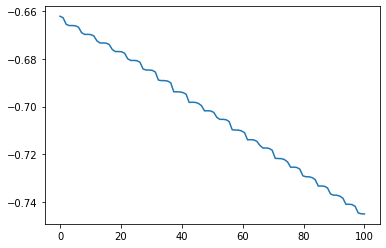

In [46]:
rk = [Rplot1, Rplot2, Rplot3, Rplot4, Rplot5]
lf = [Fplot1, Fplot2, Fplot3, Fplot4, Fplot5]

# I don't know how to subplot yet, so I did it one per cell, sorry! Each graph shows energy versus time.
# First go all the Runge-Kutta from h=1 to h = 0.01, and then all the leapfrogs in a similar fashion.

ta = np.linspace(0,100,100)
plt.plot(ta, Energy(rk[0]));

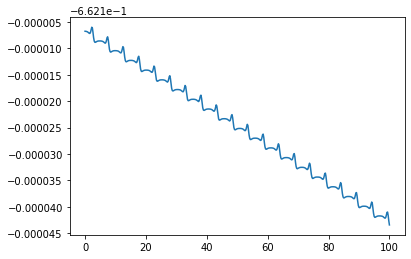

In [19]:
tb = np.linspace(0,100,500)
plt.plot(tb, Energy(rk[1]));

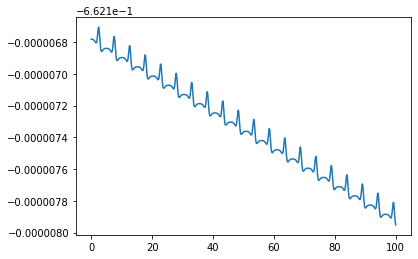

In [20]:
tc = np.linspace(0,100,1001)
plt.plot(tc, Energy(rk[2]));

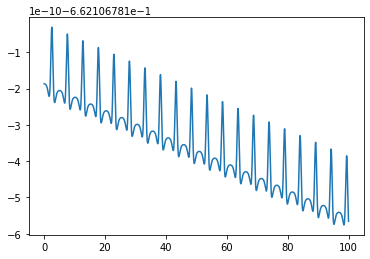

In [21]:
td = np.linspace(0,100,5001)
plt.plot(td, Energy(rk[3]));

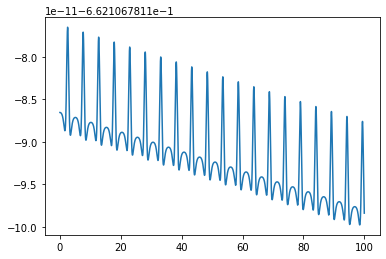

In [22]:
te = np.linspace(0,100,10000)
plt.plot(te, Energy(rk[4]));

Leapfrog time!

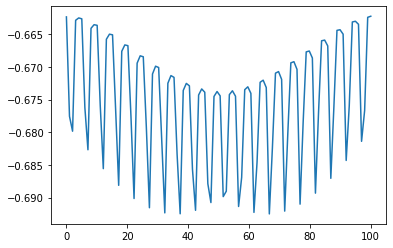

In [23]:
ta = np.linspace(0,100,100)
plt.plot(ta, Energy(lf[0]));

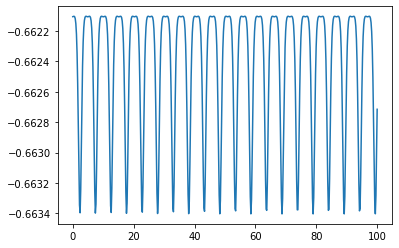

In [24]:
tb = np.linspace(0,100,500)
plt.plot(tb, Energy(lf[1]));

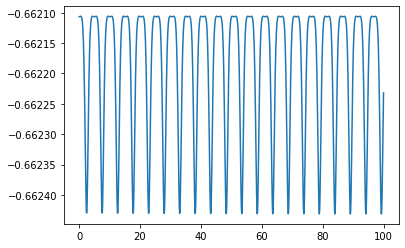

In [25]:
tc = np.linspace(0,100,1001)
plt.plot(tc, Energy(lf[2]));

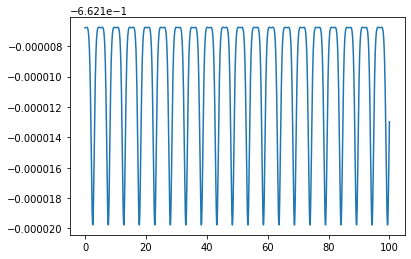

In [26]:
td = np.linspace(0,100,5001)
plt.plot(td, Energy(lf[3]));

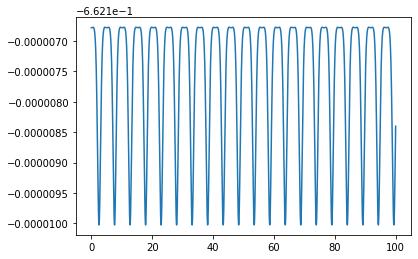

In [27]:
te = np.linspace(0,100,10000)
plt.plot(te, Energy(lf[4]));

Thank you for going through this! It's insanely long and should have been more efficient, but I did the best I could with my sad coding as I call it. More practice makes perfect! Woo!